# Import the Libraries

In [54]:
import pandas as pd
import unidecode

# Run the code to get player data in list

In [55]:
# alphabet = 'abcdefghijklmnopqrstuvwxyz'
# base_url = 'https://www.basketball-reference.com/players'
# temp = []

# for letter in alphabet:
#     df = pd.read_html(f"{base_url}/{letter}/")[0]
#     df['Letter'] = [letter]*len(df)
#     temp.append(df)
    
# data = pd.concat(temp)
# data = data.reset_index(drop = True)

# data.to_csv('all_players.csv', index = False)

# Get data from csv file instead

In [56]:
data = pd.read_csv('all_players.csv')
data

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Letter
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke,a
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State,a
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,"April 16, 1947",UCLA,a
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",LSU,a
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974","Michigan, San Jose State",a
...,...,...,...,...,...,...,...,...,...
5095,Ante Žižić,2018,2020,F-C,6-10,266.0,"January 4, 1997",NaN,z
5096,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University,z
5097,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne,z
5098,Ivica Zubac,2017,2023,C,7-0,240.0,"March 18, 1997",NaN,z


# Get stars and middleNames

In [57]:
starPlayers = [player for player in data.Player if player[-1] == '*']
players = [unidecode.unidecode(player) if player not in starPlayers else unidecode.unidecode(player[0:-1]) for player in data.Player]
data.Player = players
middleNames = [name for name in data.Player if (len(name.split(' '))>2)]

# Set up loop to get player dataframes

In [58]:
base_url = 'https://www.basketball-reference.com/players'
CornerCases={
    "Luc Mbah a Moute":  "mbahalu",
    "Metta World Peace": "artesro",
    "Logan Vander Velden": "vandelo",
    "Nene": "hilarne",
    "Jeff Ayres": "pendeje",
    "Mark Baker": "bakerla",
    "J.J. Barea": "bareajo",
    "George Bon Salle": "bonsage", ## Could check for bon with the vans and vons
    "Clint Capela": "capelca",
    "Dick Clark": "clarkri",
    "Gigi Datome": "datomlu",
    "Vinny Del Negro": "delnevi",
    "Nando De Colo": "decolna",  ## and dels
    "Rich Eichhorst": "eichhdi",
    "Wayne Engelstad": "englewa",
    "Bill Franklin": "frankwi",
    "Enes Freedom": "kanteen",
    "Smokey Gaines": "gaineda",
    "Gene Gallette": "gillege",
    "Bubbles Hawkins": "hawkiro",
    "Walt Hazzard": "abdulma",
    "Paul Hogue": "hoguedu",
    "Alfredrick Hughes": "hugheri",
    "Howie Jolliff": "jolifho",
    "Derrick Jones Jr.": "jonesde",
    "Jaren Jackson Jr.": "jacksja",
    "Maxi Kleber": "klebima",
    "Didi Louzada": "louzama",
    "Sheldon Mac": "mcclesh",
    "D.J. Mbenga": "mbengdj", ## weird ass example
    "Frank Ntilikina": "ntilila",
    "Cedi Osman": "osmande",
    "Sasha Pavlovic": "pavloal",
    "Jim Phelan": "phelaja",
    "Don Putman": "putnado",
    "Bob Rensberger": "rensbro",
    "Mouhamed Sene": "senesa",
    "Edy Tavares": "tavarwa",
    "Gene Tormohlen": "tormobu",
    "Marcus Vinicius": "vincima",
    "Henry Walker": "walkebi",
    "Mo Williams": "willima",
    "Jimmy Foster": "fosteja"
    
}
extensions = []


for i in range(len(data)):
    
    player = data.iloc[i].Player
    FullName = unidecode.unidecode(player)
    
    if FullName in CornerCases.keys():
        extension = CornerCases[FullName]
        data.at[i,'Letter'] = extension[0]
    else:
        
        FullName = FullName.replace("'","")
        FullName = FullName.replace(".","")
        FullName = FullName.replace("-","")
        letter = data.iloc[i].Letter
        name_array = FullName.split(' ')
        
        if len(name_array)>2:
            first2 = name_array[0][0:2].lower()
            

            if name_array[1].lower() == "von" or (name_array[1].lower()=="van"):
                first5 = name_array[1][0:3].lower() + name_array[2][0:2].lower()
            else:
                for j in range(len(name_array)-1, 0, -1):
                    if name_array[j][0].lower() == letter:
                        first5= name_array[j][0:5].lower()
                        break

        else:
            first5 = name_array[1][0:5].lower()
            first2 = name_array[0][0:2].lower()

        extension = first5 + first2

    extensions.append(extension)

data['Extension'] = extensions    

In [59]:
print("FullName: ", FullName)
print("extension: ", extension)
print("letter: ", letter)
print("Possible url: ", f'{base_url}/{letter}/{extension}01.html')

FullName:  Matt Zunic
extension:  zunicma
letter:  z
Possible url:  https://www.basketball-reference.com/players/z/zunicma01.html


# Check duplicate extensions

In [60]:
########Put logic to get columns for number#############
data = data.sort_values(['Extension','From']).reset_index(drop = True)

CornerCaseNumbers = {
    "hairspj01": 2,
    "munfoxa01": 2,
    "brownch03": 5,
    "brownke02": 3,
    "burtode01": 2,
    "davisjo03": 6,
    "fostemi01": 2,
    "greenja03": 5,
    "howarma01": 2,
    "jacksjo01": 2,
    "johnsda05": 8,
    "johnsja03": 5,
    "johnske05": 7,
    "jonesca02": 3,
    "jonesja03": 4,
    "jonesma04": 5,
    "smithja03": 4,
    "smithto01": 2,
    "tilliki01": 2,
    "washity01": 2,
    "willial04": 6,
    "willibr02": 3,
    "willija05": 6,
    "willima06": 7,
    "williro03": 4,
    
    
}

resetNum = 1
prevNum = 1
numbers = [1]
currentNum = 1

for i in range(1,len(data)):
    if data.iloc[i].Extension == data.iloc[i-1].Extension:
        currentNum = prevNum + 1
    else: 
        currentNum = resetNum
    
    key = f"{data.iloc[i].Extension}{str(currentNum).zfill(2)}"
    if key in CornerCaseNumbers.keys(): 
        currentNum = CornerCaseNumbers[key]
    
    prevNum = currentNum
    numbers.append(currentNum)
    
numbers = [str(number).zfill(2) for number in numbers]
data['Number'] = numbers

# Generate the correct urls (and verify no duplicates)

In [61]:
urls = []

for i in range(len(data)):
    row = data.iloc[i]
    url = f"{base_url}/{row.Letter}/{row.Extension}{row.Number}.html"
    urls.append(url)
    
data['url'] = urls
assert(len(data['url'].unique()) == len(data))

# Read htmls and write csvs

In [ ]:
import time
import os

len_data = len(data)
bad_rows = []

raw_dir = 'raw_player_dfs/'
if not os.path.exists(raw_dir):
    os.makedirs(raw_dir)

for i in range(len_data):
    
    row = data.iloc[i]
    path = f'raw_player_dfs/{row.Letter}'
    
    if not os.path.exists(path):
        os.makedirs(path)
    file = f"{path}/{row.Extension}{row.Number}.csv"

    if os.path.isfile(file) and row.To != 2023: ####PUT CONDITION FOR CURRENT PLAYERS
        continue
    else:
        try:
            time.sleep(2)
            print(f"{i+1}/{len_data}", row.Player)
            player_df = pd.read_html(row.url)[0]
            player_df.to_csv(file, index = False)
        except:
            print(f'Did not work at index {i}:', row.Player)
            bad_rows.append(row)
    
            
try:
    bad_df = pd.concat(bad_rows,axis =1).T
except:
    print("All players generated! Yay!")

12/5100 Precious Achiuwa
25/5100 Steven Adams
27/5100 Bam Adebayo
32/5100 Ochai Agbaji
45/5100 Santi Aldama


# Clean up dataframe

In [325]:
import os

alphabet = 'abcdefghijklmnopqrstuvwxyz'
ALPHABET = alphabet.upper()

clean_dir = 'player_dfs/'
if not os.path.exists(clean_dir):
    os.makedirs(clean_dir)
    
len_data = len(data)
bad_rows = []
    
for index,row in data.iterrows():
    
    print(f'{index+1}/{len_data}',row.Player)
    
    try:
        path = f'{clean_dir}{row.Letter}'
        if not os.path.exists(path):
            os.makedirs(path)
    #####################################READ IN RAW PLAYER DF####################################
        file = f'{row.Letter}/{row.Extension}{row.Number}.csv'
        raw_player_df = pd.read_csv(f'raw_player_dfs/{file}')
        player_df = raw_player_df.dropna(subset = ['Pos'])

    ####################################CHECK FOR DNP SEASONS################################
        if player_df.G.dtype == 'object':
            DNP = [False if (row[1].G[0] in alphabet) or (row[1].G[0] in ALPHABET) else True for row in player_df.iterrows()]
            player_df = player_df[DNP]

    ########################DROP DUPLICATE SEASON TO GET TOT#####################################
        player_df = player_df.drop_duplicates(subset = ['Season'], keep = 'first')
        player_df = player_df.reset_index(drop = True)

    ############################WRITE THE CSV FILE#######################################
        file = f'{clean_dir}{file}'
        player_df = player_df.set_index('Season')
        player_df['Player'] = [row.Player]*len(player_df)
        player_df['Pos'] = [row.Pos]*len(player_df)
        player_df['Ht'] = [row.Ht]*len(player_df)
        player_df.to_csv(file)
    
    except:
        print(f'Did not work at index {i}:', row.Player)
        bad_rows.append(row)
        
try:
    bad_df = pd.concat(bad_rows,axis =1).T
except:
    print("All players generated! Yay!")

1/5100 Alaa Abdelnaby
2/5100 Kareem Abdul-Jabbar
3/5100 Walt Hazzard
4/5100 Mahmoud Abdul-Rauf
5/5100 Tariq Abdul-Wahad
6/5100 Zaid Abdul-Aziz
7/5100 Shareef Abdur-Rahim
8/5100 Tom Abernethy
9/5100 Forest Able
10/5100 John Abramovic
11/5100 Alex Abrines
12/5100 Precious Achiuwa
13/5100 Alex Acker
14/5100 Don Ackerman
15/5100 Mark Acres
16/5100 Bud Acton
17/5100 Quincy Acy
18/5100 Alvan Adams
19/5100 Don Adams
20/5100 George Adams
21/5100 Hassan Adams
22/5100 Jaylen Adams
23/5100 Jordan Adams
24/5100 Michael Adams
25/5100 Steven Adams
26/5100 Rafael Addison
27/5100 Bam Adebayo
28/5100 Deng Adel
29/5100 Rick Adelman
30/5100 Jeff Adrien
31/5100 Arron Afflalo
32/5100 Ochai Agbaji
33/5100 Maurice Ager
34/5100 Mark Aguirre
35/5100 Blake Ahearn
36/5100 Danny Ainge
37/5100 Matt Aitch
38/5100 Alexis Ajinca
39/5100 Henry Akin
40/5100 Josh Akognon
41/5100 DeVaughn Akoon-Purcell
42/5100 Solomon Alabi
43/5100 Mark Alarie
44/5100 Gary Alcorn
45/5100 Santi Aldama
46/5100 Furkan Aldemir
47/5100 Cole A

370/5100 Nemanja Bjelica
371/5100 Uwe Blab
372/5100 Alex Blackwell
373/5100 Charlie Black
374/5100 Cory Blackwell
375/5100 James Blackwell
376/5100 Nate Blackwell
377/5100 Norman Black
378/5100 Rolando Blackman
379/5100 Tarik Black
380/5100 Tom Black
381/5100 DeJuan Blair
382/5100 Antonio Blakeney
383/5100 Steve Blake
384/5100 Will Blalock
385/5100 George Blaney
386/5100 Lance Blanks
387/5100 Ricky Blanton
388/5100 Andray Blatche
389/5100 Mookie Blaylock
390/5100 Eric Bledsoe
391/5100 Keljin Blevins
392/5100 Leon Blevins
393/5100 John Block
394/5100 Mike Bloom
395/5100 Jaron Blossomgame
396/5100 Corie Blount
397/5100 Mark Blount
398/5100 Vander Blue
399/5100 Ray Blume
400/5100 Tony Bobbitt
401/5100 Nelson Bobb
402/5100 Bucky Bockhorn
403/5100 Buddy Boeheim
404/5100 Tom Boerwinkle
405/5100 Keith Bogans
406/5100 Bojan Bogdanovic
407/5100 Bogdan Bogdanovic
408/5100 Muggsy Bogues
409/5100 Andrew Bogut
410/5100 Etdrick Bohannon
411/5100 Bol Bol
412/5100 Jonah Bolden
413/5100 Marques Bolden


766/5100 Julian Champagnie
767/5100 Mike Champion
768/5100 Kennedy Chandler
769/5100 Tyson Chandler
770/5100 Wilson Chandler
771/5100 Don Chaney
772/5100 John Chaney
773/5100 Rex Chapman
774/5100 Wayne Chapman
775/5100 Len Chappell
776/5100 Ken Charles
777/5100 Lorenzo Charles
778/5100 Joe Chealey
779/5100 Calbert Cheaney
780/5100 Zylan Cheatham
781/5100 Maurice Cheeks
782/5100 Phil Chenier
783/5100 Will Cherry
784/5100 Derrick Chievous
785/5100 Pete Chilcutt
786/5100 Chris Childs
787/5100 Josh Childress
788/5100 Randolph Childress
789/5100 Chris Chiozza
790/5100 Leroy Chollet
791/5100 Jim Chones
792/5100 Bob Christian
793/5100 Cal Christensen
794/5100 Dionte Christmas
795/5100 Doug Christie
796/5100 Fred Christ
797/5100 Josh Christopher
798/5100 Marquese Chriss
799/5100 Max Christie
800/5100 Patrick Christopher
801/5100 Rakeem Christmas
802/5100 Semaj Christon
803/5100 Steve Chubin
804/5100 Robert Churchwell
805/5100 Archie Clark
806/5100 Brandon Clarke
807/5100 Carlos Clark
808/5100 

1132/5100 Bob Dille
1133/5100 Hook Dillon
1134/5100 Byron Dinkins
1135/5100 Jackie Dinkins
1136/5100 Harry Dinnel
1137/5100 Bill Dinwiddie
1138/5100 Spencer Dinwiddie
1139/5100 Ike Diogu
1140/5100 DeSagana Diop
1141/5100 Terry Dischinger
1142/5100 Fred Diute
1143/5100 Vlade Divac
1144/5100 Donte DiVincenzo
1145/5100 Juan Dixon
1146/5100 Aleksandar Djordjevic
1147/5100 Earl Dodd
1148/5100 Michael Doleac
1149/5100 Joe Dolhon
1150/5100 Bob Doll
1151/5100 James Donaldson
1152/5100 Luka Doncic
1153/5100 Bob Donham
1154/5100 Billy Donovan
1155/5100 Harry Donovan
1156/5100 Keyon Dooling
1157/5100 Jacky Dorsey
1158/5100 Joey Dorsey
1159/5100 Ron Dorsey
1160/5100 Tyler Dorsey
1161/5100 Luguentz Dort
1162/5100 Ayo Dosunmu
1163/5100 Damyean Dotson
1164/5100 Devon Dotson
1165/5100 Quincy Douby
1166/5100 Bruce Douglas
1167/5100 Chris Douglas-Roberts
1168/5100 John Douglas
1169/5100 Leon Douglas
1170/5100 Sherman Douglas
1171/5100 Toney Douglas
1172/5100 Sekou Doumbouya
1173/5100 Jerry Dover
1174/51

1491/5100 Tony Fuller
1492/5100 Todd Fuller
1493/5100 Markelle Fultz
1494/5100 Lawrence Funderburke
1495/5100 Terry Furlow
1496/5100 Bill Gabor
1497/5100 Wenyen Gabriel
1498/5100 Dan Gadzuric
1499/5100 Daniel Gafford
1500/5100 Deng Gai
1501/5100 Bill Gaines
1502/5100 Corey Gaines
1503/5100 Smokey Gaines
1504/5100 Elmer Gainer
1505/5100 Reece Gaines
1506/5100 Sundiata Gaines
1507/5100 Mike Gale
1508/5100 Chad Gallagher
1509/5100 Harry Gallatin
1510/5100 Danilo Gallinari
1511/5100 Langston Galloway
1512/5100 Dave Gambee
1513/5100 Kevin Gamble
1514/5100 Bob Gantt
1515/5100 Jorge Garbajosa
1516/5100 Ruben Garces
1517/5100 Alex Garcia
1518/5100 Francisco Garcia
1519/5100 Chuck Gardner
1520/5100 Earl Gardner
1521/5100 Ken Gardner
1522/5100 Thomas Gardner
1523/5100 Vern Gardner
1524/5100 Jack Garfinkel
1525/5100 Patricio Garino
1526/5100 Darius Garland
1527/5100 Gary Garland
1528/5100 Winston Garland
1529/5100 Dick Garmaker
1530/5100 Bill Garner
1531/5100 Bill Garnett
1532/5100 Chris Garner
1

1870/5100 Tony Harris
1871/5100 Tobias Harris
1872/5100 Isaiah Hartenstein
1873/5100 Jason Hart
1874/5100 Josh Hart
1875/5100 Antonio Harvey
1876/5100 Donnell Harvey
1877/5100 Clem Haskins
1878/5100 Scott Haskin
1879/5100 Udonis Haslem
1880/5100 Billy Hassett
1881/5100 Joe Hassett
1882/5100 Trenton Hassell
1883/5100 Scott Hastings
1884/5100 Kirk Haston
1885/5100 Vern Hatton
1886/5100 Sam Hauser
1887/5100 John Havlicek
1888/5100 Spencer Hawes
1889/5100 Steve Hawes
1890/5100 Connie Hawkins
1891/5100 Hersey Hawkins
1892/5100 Juaquin Hawkins
1893/5100 Marshall Hawkins
1894/5100 Michael Hawkins
1895/5100 Bubbles Hawkins
1896/5100 Tom Hawkins
1897/5100 Nate Hawthorne
1898/5100 Chuck Hayes
1899/5100 Elvin Hayes
1900/5100 Jarvis Hayes
1901/5100 Jaxson Hayes
1902/5100 Jim Hayes
1903/5100 Killian Hayes
1904/5100 Nigel Hayes
1905/5100 Steve Hayes
1906/5100 Gordon Hayward
1907/5100 Lazar Hayward
1908/5100 Brendan Haywood
1909/5100 Spencer Haywood
1910/5100 John Hazen
1911/5100 Luther Head
1912/510

2247/5100 Clemon Johnson
2248/5100 Clay Johnson
2249/5100 Dave Johnson
2250/5100 Darryl Johnson
2251/5100 Darius Johnson-Odom
2252/5100 Dakari Johnson
2253/5100 David Johnson
2254/5100 Dennis Johnson
2255/5100 DeMarco Johnson
2256/5100 DerMarr Johnson
2257/5100 Ed Johnson
2258/5100 Eddie Johnson
2259/5100 Eddie Johnson
2260/5100 Eric Johnson
2261/5100 Ervin Johnson
2262/5100 Frank Johnson
2263/5100 George Johnson
2264/5100 George Johnson
2265/5100 George Johnson
2266/5100 Gus Johnson
2267/5100 Harold Johnson
2268/5100 Ivan Johnson
2269/5100 James Johnson
2270/5100 JaJuan Johnson
2271/5100 Jalen Johnson
2272/5100 Jim Johnstone
2273/5100 John Johnson
2274/5100 Joe Johnson
2275/5100 Kannard Johnson
2276/5100 Ken Johnson
2277/5100 Kevin Johnson
2278/5100 Ken Johnson
2279/5100 Keldon Johnson
2280/5100 Keon Johnson
2281/5100 Larry Johnson
2282/5100 Larry Johnson
2283/5100 Lee Johnson
2284/5100 Linton Johnson
2285/5100 Marques Johnson
2286/5100 Magic Johnson
2287/5100 Mickey Johnson
2288/5100

2622/5100 Acie Law
2623/5100 Gani Lawal
2624/5100 Edmund Lawrence
2625/5100 A.J. Lawson
2626/5100 Jason Lawson
2627/5100 Ty Lawson
2628/5100 Vic Law
2629/5100 Jake Layman
2630/5100 Mo Layton
2631/5100 T.J. Leaf
2632/5100 Manny Leaks
2633/5100 Hal Lear
2634/5100 Allen Leavell
2635/5100 Jeff Lebo
2636/5100 Eric Leckner
2637/5100 Jalen Lecque
2638/5100 Ricky Ledo
2639/5100 Butch Lee
2640/5100 Clyde Lee
2641/5100 Courtney Lee
2642/5100 Dave Lee
2643/5100 David Lee
2644/5100 Damion Lee
2645/5100 Ed Leede
2646/5100 Dick Lee
2647/5100 Doug Lee
2648/5100 George Lee
2649/5100 Greg Lee
2650/5100 Keith Lee
2651/5100 Kurk Lee
2652/5100 Malcolm Lee
2653/5100 Ron Lee
2654/5100 Rock Lee
2655/5100 Russ Lee
2656/5100 Saben Lee
2657/5100 Hank Lefkowitz
2658/5100 Tim Legler
2659/5100 George Lehmann
2660/5100 Barry Leibowitz
2661/5100 Walt Lemon Jr.
2662/5100 Alex Len
2663/5100 Voshon Lenard
2664/5100 Leary Lentz
2665/5100 Gary Leonard
2666/5100 Kawhi Leonard
2667/5100 Meyers Leonard
2668/5100 Slick Leona

2996/5100 Kevin McKenna
2997/5100 Stan McKenzie
2998/5100 Derrick McKey
2999/5100 Aaron McKie
3000/5100 Alfonzo McKinnie
3001/5100 Billy McKinney
3002/5100 Bones McKinney
3003/5100 Carlton McKinney
3004/5100 Trey McKinney-Jones
3005/5100 JaQuori McLaughlin
3006/5100 Jordan McLaughlin
3007/5100 Ben McLemore
3008/5100 McCoy McLemore
3009/5100 George McLeod
3010/5100 Keith McLeod
3011/5100 Roshown McLeod
3012/5100 Jack McMahon
3013/5100 Jim McMillian
3014/5100 Nate McMillan
3015/5100 Shellie McMillon
3016/5100 Tom McMillen
3017/5100 Mal McMullen
3018/5100 Chet McNabb
3019/5100 Joe McNamee
3020/5100 Mark McNamara
3021/5100 Chris McNealy
3022/5100 Jerel McNeal
3023/5100 Bob McNeill
3024/5100 Larry McNeill
3025/5100 Carl McNulty
3026/5100 Paul McPherson
3027/5100 Roy McPipe
3028/5100 Cozell McQueen
3029/5100 Jordan McRae
3030/5100 Thales McReynolds
3031/5100 Josh McRoberts
3032/5100 Eric McWilliams
3033/5100 George Mearns
3034/5100 Stanislav Medvedenko
3035/5100 Darnell Mee
3036/5100 Jodie M

3365/5100 Ed O'Bannon
3366/5100 Fabricio Oberto
3367/5100 John O'Boyle
3368/5100 Bob O'Brien
3369/5100 Jimmy O'Brien
3370/5100 Jim O'Brien
3371/5100 J.J. O'Brien
3372/5100 Ralph O'Brien
3373/5100 Johnny O'Bryant
3374/5100 Patrick O'Bryant
3375/5100 Daniel Ochefu
3376/5100 Dermie O'Connell
3377/5100 Greg Oden
3378/5100 Lamar Odom
3379/5100 Andy O'Donnell
3380/5100 Bud Ogden
3381/5100 Ralph Ogden
3382/5100 Alan Ogg
3383/5100 Buddy O'Grady
3384/5100 Fran O'Hanlon
3385/5100 Tim Ohlbrecht
3386/5100 Don Ohl
3387/5100 Semi Ojeleye
3388/5100 Emeka Okafor
3389/5100 Jahlil Okafor
3390/5100 Dick O'Keefe
3391/5100 Tommy O'Keefe
3392/5100 Chuma Okeke
3393/5100 Elie Okobo
3394/5100 Josh Okogie
3395/5100 Onyeka Okongwu
3396/5100 Mike O'Koren
3397/5100 Isaac Okoro
3398/5100 KZ Okpala
3399/5100 Mehmet Okur
3400/5100 Victor Oladipo
3401/5100 Hakeem Olajuwon
3402/5100 Mark Olberding
3403/5100 Jawann Oldham
3404/5100 John Oldham
3405/5100 Frank Oleynick
3406/5100 Brian Oliver
3407/5100 Cameron Oliver
3408

3719/5100 Julius Randle
3720/5100 Anthony Randolph
3721/5100 Shavlik Randolph
3722/5100 Zach Randolph
3723/5100 Wally Rank
3724/5100 Kelvin Ransey
3725/5100 Sam Ranzino
3726/5100 Bobby Rascoe
3727/5100 Blair Rasmussen
3728/5100 Xavier Rathan-Mayes
3729/5100 George Ratkovicz
3730/5100 Ed Ratleff
3731/5100 Mike Ratliff
3732/5100 Theo Ratliff
3733/5100 Andy Rautins
3734/5100 Leo Rautins
3735/5100 Allan Ray
3736/5100 Clifford Ray
3737/5100 Don Ray
3738/5100 James Ray
3739/5100 Jim Ray
3740/5100 Jimmy Rayl
3741/5100 Craig Raymond
3742/5100 Connie Rea
3743/5100 Austin Reaves
3744/5100 Joe Reaves
3745/5100 Josh Reaves
3746/5100 Zeljko Rebraca
3747/5100 Eldridge Recasner
3748/5100 Cam Reddish
3749/5100 Michael Redd
3750/5100 Frank Reddout
3751/5100 J.J. Redick
3752/5100 Marlon Redmond
3753/5100 Davon Reed
3754/5100 Hub Reed
3755/5100 Justin Reed
3756/5100 Paul Reed
3757/5100 Ron Reed
3758/5100 Willis Reed
3759/5100 Willie Reed
3760/5100 Bryant Reeves
3761/5100 Khalid Reeves
3762/5100 Richie Re

4067/5100 Alperen Sengun
4068/5100 Kevin Seraphin
4069/5100 Ansu Sesay
4070/5100 Ramon Sessions
4071/5100 Ha Seung-Jin
4072/5100 Tom Sewell
4073/5100 Collin Sexton
4074/5100 Paul Seymour
4075/5100 Nick Shaback
4076/5100 Charles Shackleford
4077/5100 Lynn Shackelford
4078/5100 Carl Shaeffer
4079/5100 Lee Shaffer
4080/5100 Mustafa Shakur
4081/5100 Landry Shamet
4082/5100 God Shammgod
4083/5100 Earl Shannon
4084/5100 Howie Shannon
4085/5100 Chuck Share
4086/5100 Bill Sharman
4087/5100 Day'Ron Sharpe
4088/5100 Shaedon Sharpe
4089/5100 Walter Sharpe
4090/5100 John Shasky
4091/5100 Ron Shavlik
4092/5100 Brian Shaw
4093/5100 Casey Shaw
4094/5100 Marial Shayok
4095/5100 Bob Shea
4096/5100 Fred Sheffield
4097/5100 Craig Shelton
4098/5100 Lonnie Shelton
4099/5100 Tornike Shengelia
4100/5100 Billy Shepherd
4101/5100 Jeff Sheppard
4102/5100 Steve Sheppard
4103/5100 Ed Sherod
4104/5100 Charley Shipp
4105/5100 Paul Shirley
4106/5100 Gene Short
4107/5100 Purvis Short
4108/5100 Dexter Shouse
4109/5100

4433/5100 Ira Terrell
4434/5100 Jared Terrell
4435/5100 Carlos Terry
4436/5100 Chuck Terry
4437/5100 Claude Terry
4438/5100 Dalen Terry
4439/5100 Emanuel Terry
4440/5100 Jason Terry
4441/5100 Tyrell Terry
4442/5100 Jon Teske
4443/5100 Hasheem Thabeet
4444/5100 Tom Thacker
4445/5100 Floyd Theard
4446/5100 Daniel Theis
4447/5100 Reggie Theus
4448/5100 Peter Thibeaux
4449/5100 Bill Thieben
4450/5100 Justus Thigpen
4451/5100 David Thirdkill
4452/5100 Adonis Thomas
4453/5100 Billy Thomas
4454/5100 Brodric Thomas
4455/5100 Carl Thomas
4456/5100 Cam Thomas
4457/5100 Charles Thomas
4458/5100 Etan Thomas
4459/5100 Irving Thomas
4460/5100 Isiah Thomas
4461/5100 Isaiah Thomas
4462/5100 Jamel Thomas
4463/5100 James Thomas
4464/5100 Jim Thomas
4465/5100 Joe Thomas
4466/5100 John Thomas
4467/5100 Kenny Thomas
4468/5100 Khyri Thomas
4469/5100 Kurt Thomas
4470/5100 Lance Thomas
4471/5100 Malcolm Thomas
4472/5100 Matt Thomas
4473/5100 Ron Thomas
4474/5100 Terry Thomas
4475/5100 Tim Thomas
4476/5100 Tyr

4787/5100 Bob Weiss
4788/5100 Rick Weitzman
4789/5100 Bonzi Wells
4790/5100 Bubba Wells
4791/5100 Owen Wells
4792/5100 Ralph Wells
4793/5100 Chris Welp
4794/5100 Jiri Welsch
4795/5100 Thomas Welsh
4796/5100 Bill Wennington
4797/5100 Matt Wenstrom
4798/5100 Robert Werdann
4799/5100 Ray Wertis
4800/5100 Blake Wesley
4801/5100 David Wesley
4802/5100 Walt Wesley
4803/5100 Dexter Westbrook
4804/5100 Russell Westbrook
4805/5100 David West
4806/5100 Delonte West
4807/5100 Doug West
4808/5100 Jerry West
4809/5100 Mark West
4810/5100 Mario West
4811/5100 Paul Westphal
4812/5100 Roland West
4813/5100 John Wetzel
4814/5100 Robert Whaley
4815/5100 Ennis Whatley
4816/5100 DeJuan Wheat
4817/5100 Clinton Wheeler
4818/5100 Tyson Wheeler
4819/5100 Skippy Whitaker
4820/5100 Andrew White
4821/5100 Coby White
4822/5100 Derrick White
4823/5100 D.J. White
4824/5100 Donald Whiteside
4825/5100 Eric White
4826/5100 Hassan Whiteside
4827/5100 Herb White
4828/5100 Hubie White
4829/5100 Isaiah Whitehead
4830/5100

# Generate ratings for each season

In [358]:
from sklearn.preprocessing import StandardScaler
import numpy as np    


seasons = list(range(1980,2024))
target_num_players = 250
weightings = {"PTS": 5,"AST": 3.5,"TRB": 3,"STL": 1.5,"BLK": 1.5,"eFG%": 2,"FT%": 1,"TOV": -1,"PF": -1}
stats = list(weightings.keys())


season_dir = 'season_ratings/'
if not os.path.exists(season_dir):
    os.makedirs(season_dir)


for i in range (len(seasons)):
    
    season_data = []
    ###############INSERT LOOOOOOOOOOOOOOP HERE########################
    season = seasons[i]
    season_string = f"{season-1}-{str(season%100).zfill(2)}"
    print(season_string)

    #######################GET ELIGIBLE PLAYERS########################
    players = data.query(f"From <= {season} and To >= {season}")

    for j in range(len(players)):
        row = players.iloc[j]
        player_data = pd.read_csv(f"player_dfs/{row.Letter}/{row.Extension}{row.Number}.csv", index_col = 'Season') 
        if season_string in player_data.index:
            season_row = player_data.loc[season_string]
            season_data.append(season_row)

    season_data = pd.concat(season_data,axis =1).T
    season_data = season_data.set_index("Player")
    season_data = season_data.fillna(0)
    if len(season_data) > target_num_players:
        min_games = int(season_data.sort_values('G', ascending = False).iloc[target_num_players].G)
        season_data = season_data.query(f"G >= {min_games}")

    scaler = StandardScaler()
    season_data[stats] = scaler.fit_transform(np.array(season_data[stats]))
    season_data = season_data.filter(['Player','Pos','Ht']+ stats)
    season_data[stats] = season_data[stats].multiply(list(weightings.values()))
    season_data['ChrissyMetric'] = season_data[stats].sum(axis = 1)
    season_data = season_data.sort_values("ChrissyMetric", ascending = False) 
    
    path = f'{season_dir}{season_string}.csv'
    season_data.to_csv(path)

1979-80
20
1980-81
33
1981-82
41
1982-83
40
1983-84
43
1984-85
42
1985-86
40
1986-87
41
1987-88
37
1988-89
50
1989-90
55
1990-91
56
1991-92
52
1992-93
54
1993-94
53
1994-95
54
1995-96
59
1996-97
56
1997-98
57
1998-99
36
1999-00
57
2000-01
57
2001-02
57
2002-03
58
2003-04
56
2004-05
61
2005-06
57
2006-07
59
2007-08
60
2008-09
59
2009-10
60
2010-11
58
2011-12
47
2012-13
59
2013-14
59
2014-15
59
2015-16
60
2016-17
61
2017-18
59
2018-19
58
2019-20
51
2020-21
48
2021-22
55
2022-23
52


(array([ 11.,  40.,  96., 111.,  67.,  33.,  30.,  15.,   6.,   3.]),
 array([-22.8282549 , -16.8327905 , -10.83732609,  -4.84186168,
          1.15360272,   7.14906713,  13.14453154,  19.13999594,
         25.13546035,  31.13092476,  37.12638916]),
 <BarContainer object of 10 artists>)

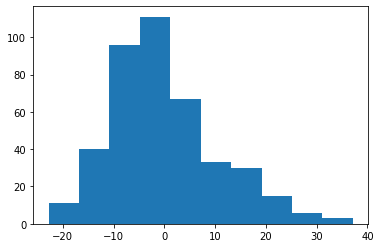

In [285]:
plt.hist(season_data.ChrissyMetric)

In [322]:
data
#list of possible bugs

#1. Making sure its the correct league
#2. Checking if the season_string is even in there (maybe they played overseas or pulled an MJ)
#3. For you to find out

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Letter,Extension,Number,url
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke,a,abdelal,01,https://www.basketball-reference.com/players/a...
1,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947",UCLA,a,abdulka,01,https://www.basketball-reference.com/players/a...
2,Walt Hazzard,1965,1974,G,6-2,185.0,"April 15, 1942",UCLA,a,abdulma,01,https://www.basketball-reference.com/players/a...
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",LSU,a,abdulma,02,https://www.basketball-reference.com/players/a...
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974","Michigan, San Jose State",a,abdulta,01,https://www.basketball-reference.com/players/a...
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,Ante Zizic,2018,2020,F-C,6-10,266.0,"January 4, 1997",NaN,z,zizican,01,https://www.basketball-reference.com/players/z...
5096,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University,z,zoetji,01,https://www.basketball-reference.com/players/z...
5097,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne,z,zopfbi,01,https://www.basketball-reference.com/players/z...
5098,Ivica Zubac,2017,2023,C,7-0,240.0,"March 18, 1997",NaN,z,zubaciv,01,https://www.basketball-reference.com/players/z...


# DEBUG 

In [13]:
index = 1256 ##### GETTING THE PLAYER (DOESNT MATTER) (1256 is Anthony Edwards)
season = 2022 ##### THIS IS IMPORTANT

row = data.iloc[index]

###############GET THE SEASONAL ROW FOR THIS PLAYER##############
season_string = f"{season-1}-{season%100}"
season_row = pd.read_csv(f"player_dfs/{row.Letter}/{row.Extension}{row.Number}.csv", index_col = 'Season').loc[season_string]

In [14]:
season_row

Age                  20.0
Tm                    MIN
Lg                    NBA
Pos                    SG
G                      72
GS                     72
MP                   34.3
FG                    7.6
FGA                  17.3
FG%                 0.441
3P                    3.0
3PA                   8.4
3P%                 0.357
2P                    4.6
2PA                   8.9
2P%                 0.519
eFG%                0.527
FT                    3.1
FTA                   3.9
FT%                 0.786
ORB                   0.9
DRB                   3.9
TRB                   4.8
AST                   3.8
STL                   1.5
BLK                   0.6
TOV                   2.6
PF                    2.3
PTS                  21.3
Player    Anthony Edwards
Name: 2021-22, dtype: object